In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

from PIL import Image

In [2]:
to_gray = lambda img:np.sum(img.copy() * [.299,.587,.114], axis=-1)

In [3]:
def histogram(x):
    counter = dict(zip(np.arange(256),np.zeros(256).astype(int)))
    for i in x:
        counter[i//1] +=1
    return np.array(list(counter.values())),np.array(list(counter.keys()))

cumsum = lambda x:np.array([sum(x[:i+1]) for i in range(len(x))])

In [18]:
img = Image.open('seg.jpg')
img_g = to_gray(np.array(img)).astype(int)

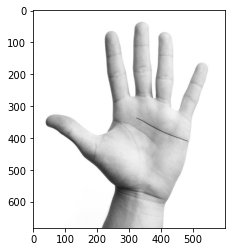

In [19]:
plt.imshow(img_g,cmap="gray")

<BarContainer object of 256 artists>

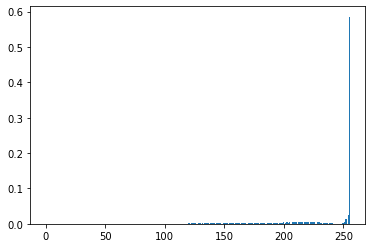

In [20]:
# Histograma original
hist,vals = histogram(img_g.flatten())
pixels = len(img_g.flatten())

plt.bar(vals,hist/pixels)

In [21]:
p = hist/pixels

In [22]:
var_hist = []

for i in range(1,254):    
    ut = np.mean(p)
    u1 = np.mean(p[:i])
    u2 = np.mean(p[i:])

    w1 = np.sum(p[:i])
    w2 = np.sum(p[i:])

    var = (w1*(u1-ut)**2 + w2*(u2-ut)**2)**.5
    
    var_hist.append(var)

In [23]:
np.argmax(var_hist)

252

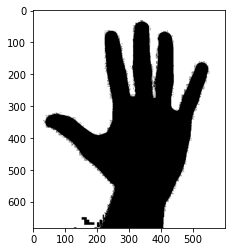

In [25]:
img_seg = img_g.copy()
th = np.argmax(var_hist)
img_seg[img_seg < th] = 0
img_seg[img_seg >= th] = 1
plt.imshow(img_seg,cmap="gray")